<a href="https://colab.research.google.com/github/MykhailoFokin/segmentation/blob/master/Text_extraction_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook preparations

## Install required libraries

In [2]:
# Function for text distance evaluation
# https://pypi.org/project/textdistance/
# https://pypi.org/project/python-Levenshtein/
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144796 sha256=27dba79b57faa3c001e17335f2975e6f925c26a23e935b25fc68e393f81dec7e
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


In [3]:
!sudo add-apt-repository ppa:alex-p/tesseract-ocr-devel -y
!sudo apt-get update
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install Pillow
!pip install pytesseract

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/alex-p/tesseract-ocr-devel/ubuntu bionic InRelease [15.4 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:13 http://security.ubuntu.

In [4]:
## Tesseract
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

#pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

!tesseract -v

tesseract 5.0.0-alpha-689-ga06d
 leptonica-1.78.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found OpenMP 201511
 Found libarchive 3.2.2 zlib/1.2.11 liblzma/5.2.2 bz2lib/1.0.6 liblz4/1.7.1


## Copy source data

In [5]:
# Github repo with source data (images, etc)
!git clone https://github.com/MykhailoFokin/segmentation

Cloning into 'segmentation'...
remote: Enumerating objects: 270, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (266/266), done.
remote: Total 548 (delta 5), reused 263 (delta 2), pack-reused 278
Receiving objects: 100% (548/548), 402.58 MiB | 13.33 MiB/s, done.
Resolving deltas: 100% (130/130), done.
Checking out files: 100% (646/646), done.


In [0]:
WORKDIR = 'segmentation'

In [6]:
"""
# Commented block in case we need crop images once more
from pycocotools.coco import COCO
from tqdm import tqdm

!mkdir '$WORKDIR/datasets/cropped_images_manual'

TARGET_FOLDER = 'pubg' # all images
#TARGET_FOLDER = 'pubg_only_pc'

CLASSES = {'score':1, 'stat':2, 'username':3}

coco = COCO(os.path.join(WORKDIR, 'pubg.json'))

cat_ids = coco.getCatIds(catNms=['games'])
img_ids = coco.getImgIds(catIds=cat_ids)
imgs = coco.loadImgs(img_ids)

masks = []
for img in tqdm(imgs, 'Crop images'):
    ann_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids)
    anns = coco.loadAnns(ann_ids)

    mask = np.zeros((img['height'], img['width']))
    for ann in anns:
      if Path(os.path.join(WORKDIR, 'datasets', TARGET_FOLDER, img['file_name'])).is_file() :
        image = cv2.imread(os.path.join(os.path.join(WORKDIR, 'datasets', TARGET_FOLDER), img['file_name']))
        x,y,w,h = ann["bbox"]
        if (w!=0 and h!=0) :
          crop_img = image[y:y+h, x:x+w]
          cv2.imwrite(os.path.join(WORKDIR, 'datasets', 'cropped_images_manual', ann['metadata']['name'] + '_' + img['file_name'][:-3]+"png"), crop_img)
"""

'\n# Commented block in case we need crop images once more\nfrom pycocotools.coco import COCO\nfrom tqdm import tqdm\n\n!mkdir \'$WORKDIR/datasets/cropped_images_manual\'\n\nTARGET_FOLDER = \'pubg\' # all images\n#TARGET_FOLDER = \'pubg_only_pc\'\n\nCLASSES = {\'score\':1, \'stat\':2, \'username\':3}\n\ncoco = COCO(os.path.join(WORKDIR, \'pubg.json\'))\n\ncat_ids = coco.getCatIds(catNms=[\'games\'])\nimg_ids = coco.getImgIds(catIds=cat_ids)\nimgs = coco.loadImgs(img_ids)\n\nmasks = []\nfor img in tqdm(imgs, \'Crop images\'):\n    ann_ids = coco.getAnnIds(imgIds=img[\'id\'], catIds=cat_ids)\n    anns = coco.loadAnns(ann_ids)\n\n    mask = np.zeros((img[\'height\'], img[\'width\']))\n    for ann in anns:\n      if Path(os.path.join(WORKDIR, \'datasets\', TARGET_FOLDER, img[\'file_name\'])).is_file() :\n        image = cv2.imread(os.path.join(os.path.join(WORKDIR, \'datasets\', TARGET_FOLDER), img[\'file_name\']))\n        x,y,w,h = ann["bbox"]\n        if (w!=0 and h!=0) :\n          cro

## Imports

In [7]:
import os
import cv2
import keras
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import numpy as np
import pandas as pd
import math
from pathlib import Path 
from google.colab import files
from Levenshtein import *

Using TensorFlow backend.


# Main text proccessing class and helper functions

## Helper function for data visualization

In [0]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
    
# helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)

    return x

## Main working class. This is our work model

In [0]:
class TextProcessor:

  def __init__(
            self, 
            work_dir,  
            preprocessing=None,
            preprocessing_add_border=None,
            print_first_3=False,
            preprocessing_resize_3033=None,
            improve_quality_for_small=None,
            use_grayscale=None,
            filter_list=None,
    ):
        self.work_dir = work_dir
        self.text_boxes = dict()
        self.preprocessing = preprocessing
        self.preprocessing_add_border = preprocessing_add_border
        self.print_first_3 = print_first_3
        self.bordersize = 2
        self.preprocessing_resize_3033=preprocessing_resize_3033
        self.default_model_lang = 'eng'
        self.model_lang = self.default_model_lang
        self.__load_csv_source_data() # load data from ground thruth file
        self.improve_quality_for_small = improve_quality_for_small
        self.grayscale = use_grayscale
        self.filter_list = filter_list

  def process_data(self, process_flag=1) :
    #for r, d, f in os.walk(os.path.join(WORKDIR, 'datasets', 'cropped_images')):
    first_3_counter = 0
    for r, d, f in os.walk(self.work_dir):
        for file in f:
            if '.png' in file:

              # Filter if needed (skip and continue from new iteration)
              if self.filter_list != None:
                if file.split("_",2)[2][0:3] not in self.filter_list:
                  continue

              if self.grayscale :
                image = cv2.imread(os.path.join(self.work_dir, file), 0)
              else :
                image = cv2.imread(os.path.join(self.work_dir, file))
              image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
              #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

              image = self.__preprocess_image(image, file)

              if process_flag == 1:
                if (file.startswith('username')) :
                  boxes = pytesseract.image_to_boxes(image, lang=self.model_lang, config='--psm 6 lstmbox')
                else :
                  boxes = pytesseract.image_to_boxes(image, lang=self.model_lang, config='--psm 6 -c tessedit_char_whitelist="01234567890#/ " lstmbox')
              elif process_flag == 2:
                if (file.startswith('username')) :
                  boxes = pytesseract.image_to_string(image, lang=self.model_lang, config='--psm 6 lstmbox')
                else :
                  boxes = pytesseract.image_to_string(image, lang=self.model_lang, config='--psm 6 -c tessedit_char_whitelist="01234567890#/ " lstmbox')
              else :
                raise Exception('Unknown processing flag {}. Only 1(boxes) and 2(strings) are allowed.'.format(process_flag))

              with open(os.path.join(self.work_dir, 'lstmbox', file[:-3]+"txt"),'w') as f: f.write(str(boxes))
              self.text_boxes[file] = boxes

              if self.print_first_3 :
                if first_3_counter<=4 :
                  self.print_recognized(image, boxes)
                  first_3_counter+=1

  def __preprocess_image(self, input_image, filename) :
    '''
      Apply all kinds of preprocessing in one method - to be able use it in other ones
    '''

    image = input_image

    if self.improve_quality_for_small : 
      '''
        Almost the same as resize_3033 but target size hardcoded as 40
          and this applied on images that in height is lower than 40 pixels
      '''
      shape0 = 40
      if (image.shape[0] < 40) :
        koef1 = 40 / image.shape[0]
        image = cv2.resize(image, (int(image.shape[1]*koef1),shape0), interpolation = cv2.INTER_NEAREST)

    if self.preprocessing_add_border :
      image = cv2.copyMakeBorder(
          image,
          top=self.bordersize,
          bottom=self.bordersize,
          left=self.bordersize,
          right=self.bordersize,
          borderType=cv2.BORDER_CONSTANT,
          value=255
      )

    if self.preprocessing == 'BINARY' :
      if 'score' in filename :
        ret,image = cv2.threshold(image,70,255,cv2.THRESH_BINARY)
      else :
        ret,image = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    elif self.preprocessing == 'OTSU' : # doesn't work with GRAY images
      image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
      ret,image = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    elif self.preprocessing == 'OTSU2' : # doesn't work with GRAY images
      image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
      ret,image = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
    elif self.preprocessing == 'BINARY_MANUAL' :
      ret,image = cv2.threshold(image,50,255,cv2.THRESH_BINARY)
    elif self.preprocessing == 'BINARY_INV' :
      if 'score' in filename :
        ret,image = cv2.threshold(image,70,255,cv2.THRESH_BINARY_INV)
      else :
        #ret,image = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
        ret,image = cv2.threshold(image,150,255,cv2.THRESH_BINARY_INV)

    if self.preprocessing_resize_3033 :
      '''
        Tesseract of approximately version 3 gives us better result on letter size about 30-33 pixels.
        
        Short description of values from target size formula
        Let's take 2 pixel as default border of picture (approximate size as we cropped images before, somewhere bigger somewhere lower). Summary is 4
        In this case we will take 33 as target value of letter size
        If we have additional border as preprocessing, let's add it to target size
      '''
      if self.preprocessing_add_border:
        additional_border_size = self.bordersize*2
      else :
        additional_border_size = 0
      target_size = 33 + 4 + additional_border_size
      width_koef = target_size / image.shape[0]
      image = cv2.resize(image, (int(image.shape[1]*width_koef),target_size), interpolation = cv2.INTER_NEAREST)

    return image

  def image_text_to_boxes(self, model) :
      if model :
        self.model_lang = model
      self.process_data(1)
      self.model_lang = self.default_model_lang

  def image_text_to_strings(self, model) :
      if model :
        self.model_lang = model
      self.process_data(2)
      self.model_lang = self.default_model_lang

  def text_boxes_to_file(self, zip_and_download = None) :  
    if zip_and_download :
      !zip -r ./segmentation/datasets/cropped_images_manual/lstmbox/lstmbox.zip ./segmentation/datasets/cropped_images_manual/lstmbox
      files.download(os.path.join(self.work_dir, 'lstmbox', "lstmbox.zip"))
    else :
      ###  Write to Text File ######
      with open(os.path.join(self.work_dir, file[:-3]+"box"),'w') as f: f.write(str(boxes))

  def print_recognized(self, image, boxes) :

      plt.figure(figsize=(10, 5))
      plt.xlabel(boxes, fontsize=14)
      plt.imshow(denormalize(image.squeeze()))
      plt.show()
  
  def print_examples(self, count_of_images) :
    i = 0
    for key in self.text_boxes :
      
      image = cv2.imread(os.path.join(WORKDIR, 'datasets', 'cropped_images_manual', key))
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      self.__preprocess_image(image, key)

      plt.figure(figsize=(10, 5))
      plt.xlabel(self.text_boxes[key], fontsize=14)
      plt.imshow(denormalize(image.squeeze()),'gray')
      plt.show()

      # Print only a few ones
      if i == count_of_images : 
        break
      else :
        i+=1

  def evaluate_manual(self, class_mask='ALL'):
    '''
      Levenshtein is calculated by following formula:
        LevenshteinScore = 100 - round( ( Levenshtein_distance / length_of_ground_truth ) * 100 , 2)

        - where:
          Levenshtein_distance is library function for calculating distance between two words by Levenshtein
          length_of_ground_truth is length of word from ground truth file (real value o picture)
          * 100 is to get percentage value from [distance / length]
          round is function to round value, as paramter we pass 2 digits after 0
          100 - round(...) is to reverse value for better user experince. It's more natural observe percent value as growing value. It's mean that the more the better result
    '''

    ground_truth = self.eval_table

    for item in self.text_boxes:
      str_index = item.find('_')
      source_file_name = item[str_index+1:-3]+'jpg'
      if (class_mask == 'ALL' or item[:str_index] == class_mask) :
        class_name = item[:str_index]
        class_name_eval = class_name + '_eval'
        class_name_tessdata = class_name + '__tessdata'
        class_name_lev = class_name + '_lev'
        z = ground_truth.loc[ground_truth['image_name'] == source_file_name][class_name].values[0]
        if z == z :
          #z = z.replace(" ", "") # remove spaces
          ground_truth.loc[ground_truth['image_name'] == source_file_name,class_name_tessdata] = self.text_boxes[item]
          ground_truth.loc[ground_truth['image_name'] == source_file_name,class_name_lev] = 100 - round(distance(self.text_boxes[item],z)/len(z)*100,2)
          if (self.text_boxes[item] == z) :
            ground_truth.loc[ground_truth['image_name'] == source_file_name,class_name_eval] = 1
          else :
            ground_truth.loc[ground_truth['image_name'] == source_file_name,class_name_eval] = 0
        else :
          ground_truth.loc[ground_truth['image_name'] == source_file_name,class_name_tessdata] = 0
          ground_truth.loc[ground_truth['image_name'] == source_file_name,class_name_eval] = 1
    ground_truth['LevenshteinScore'] = (ground_truth['username_lev'].values[0] + ground_truth['score_lev'].values[0] + ground_truth['stat_lev'].values[0])/3
    
    # Final block - set eval table property and return
    self.eval_table = ground_truth
    self.__reorder_columns() ## reorder columns by names. Source: self.eval_table
    evaluation = self.calculate_eval_fullwords(class_mask)
    
    return evaluation

  def print_one_example(self, image_name) :
      
      image = cv2.imread(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual', image_name))
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      image = self.__preprocess_image(image, image_name)

      #plt.figure(figsize=(10, 5))
      plt.xlabel(self.text_boxes[image_name], fontsize=14)
      #plt.imshow(denormalize(image.squeeze()),'gray')
      plt.imshow(denormalize(image.squeeze()))
      plt.show()

  def download_table(self, image_name) :
    self.eval_table.to_csv('eval.csv', encoding='utf-8')
    !zip -r eval1.zip eval1.csv
    files.download("eval.zip")

  def print_eval_score(self) :
    print("score")

  def calculate_eval_Levenshtein(self, class_mask) :
    ground_truth = self.eval_table
    evaluation = 0
    if (class_mask == 'ALL') :
      evaluation = (ground_truth['score_lev'].sum(skipna=True) 
                  + ground_truth['stat_lev'].sum(skipna=True) 
                  + ground_truth['username_lev'].sum(skipna=True) ) / (ground_truth['score_lev'].count() + ground_truth['stat_lev'].count() + ground_truth['username_lev'].count())
    elif class_mask=='stat' :
      evaluation = (ground_truth['stat_lev'].sum(skipna=True) ) / ground_truth['stat_lev'].count() #(ground_truth.shape[0])
    elif class_mask=='score' :
      evaluation = (ground_truth['score_lev'].sum(skipna=True) ) / ground_truth['score_lev'].count() #(ground_truth.shape[0])
    elif class_mask=='username' :
      evaluation = ( ground_truth['username_lev'].sum(skipna=True) ) / ground_truth['username_lev'].count() #(ground_truth.shape[0])

    return evaluation

  def calculate_eval_fullwords(self, class_mask) :
    ground_truth = self.eval_table

    if (class_mask == 'ALL') :
      evaluation = (ground_truth['score_eval'].sum(skipna=True) 
                  + ground_truth['stat_eval'].sum(skipna=True) 
                  + ground_truth['username_eval'].sum(skipna=True) ) / (ground_truth['score_eval'].count() + ground_truth['stat_eval'].count() + ground_truth['username_eval'].count())
    elif class_mask=='stat' :
      evaluation = (ground_truth['stat_eval'].sum(skipna=True) ) / ground_truth['stat_eval'].count() #(ground_truth.shape[0])
    elif class_mask=='score' :
      evaluation = (ground_truth['score_eval'].sum(skipna=True) ) / ground_truth['score_eval'].count() #(ground_truth.shape[0])
    elif class_mask=='username' :
      evaluation = ( ground_truth['username_eval'].sum(skipna=True) ) / ground_truth['username_eval'].count() #(ground_truth.shape[0])

    return evaluation

  def getTop(self, class_mask, returnNumber) :
    self.__sort_eval_table(class_mask)
    return self.eval_table_sorted.tail(returnNumber)

  def getWorst(self, class_mask, returnNumber) :
    self.__sort_eval_table(class_mask)
    return self.eval_table_sorted.head(returnNumber)

  def __sort_eval_table(self, class_mask) :
    if (class_mask == 'ALL') :
      self.eval_table_sorted = self.eval_table.sort_values('LevenshteinScore')
    elif class_mask=='stat' :
      self.eval_table_sorted = self.eval_table.sort_values('stat_lev')
    elif class_mask=='score' :
      self.eval_table_sorted = self.eval_table.sort_values('score_lev')
    elif class_mask=='username' :
      self.eval_table_sorted = self.eval_table.sort_values('username_lev')
    else :
      raise "Wrong class_mask for sort. Should be one of: ALL, score, stat, username."

  def __load_csv_source_data(self) :
    ground_truth = pd.read_csv(os.path.join(WORKDIR, 'text_data.csv'), sep='|')
    ground_truth.drop('Unnamed: 0', axis=1, inplace=True)
    ground_truth.drop('Unnamed: 5', axis=1, inplace=True)
    ground_truth.drop(ground_truth[ground_truth.image_name == 'pubg_100.jpg'].index, inplace=True)
    self.eval_table = ground_truth

  def __reorder_columns(self) :
    #cols = df.columns.tolist()
    #cols = cols[-1:] + cols[:-1]
    #df = df[cols]
    self.eval_table = self.eval_table.reindex(sorted(self.eval_table.columns), axis=1)

In [0]:
#!mkdir '$WORKDIR/datasets/cropped_images_manual/lstmbox'
!mkdir '$WORKDIR/datasets/pubg/cropped_images_manual/lstmbox'

## Copy trained model to source tesseract folder

In [12]:
# Copy trained model to source tesseract folder
os.rename('segmentation/text_extraction/pubg/AgencyFB','segmentation/text_extraction/pubg/AgencyFB.traineddata')
!cp segmentation/text_extraction/pubg/AgencyFB.traineddata /usr/share/tesseract-ocr/5/tessdata/
!ls /usr/share/tesseract-ocr/5/tessdata/

AgencyFB.traineddata  eng.traineddata  pdf.ttf
configs		      osd.traineddata  tessconfigs


# Model testing

In [0]:
# Lets create global results table
data = [['cropped_images_manual_full', 'AgencyFB', 'ALL', 'None', False, False, False, False, 0, 0]]
resultTable = pd.DataFrame(data, columns = ['Dataset', 'Model', 'Class', 'Preprocessing', 'Border', 'Resize_3033', 'ImproveQualityForSmall', 'GrayScale', 'FullTextScore', 'LevenshteinScore'])

## Basic run without any preprocessing. Just using pre-trained model

In [13]:
# Trained model - ALL IMAGES
%%time
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'))

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable.loc[resultTable['Dataset'] == 'cropped_images_manual_full','FullTextScore'] = fulltext_score
resultTable.loc[resultTable['Dataset'] == 'cropped_images_manual_full','LevenshteinScore'] = lev_score

print('\n==========================')
print('Timings:')

0.3346613545816733
56.623629032258066

Timings:
CPU times: user 2.81 s, sys: 1.04 s, total: 3.85 s
Wall time: 1min 21s


### Print top 5 best and worst

In [14]:
x.getTop('ALL',5)

,LevenshteinScore,image_name,score,score__tessdata,score_eval,score_lev,stat,stat__tessdata,stat_eval,stat_lev,username,username__tessdata,username_eval,username_lev
26,45.833333,pubg_126.jpg,#4/100,/100,0.0,66.67,#4 9 493,8 1 493,0.0,62.5,Angel24k,TTVZA4,0.0,12.5
25,45.833333,pubg_125.jpg,#28/100,/100,0.0,57.14,#28 3 237,#28 3 237,1.0,100.0,testerbg,CES Tg],0.0,0.0
24,45.833333,pubg_124.jpg,#25/100,#25 /100,0.0,85.71,#25 4 137,#25 4 137,1.0,100.0,ParasSolanki,ParasSolanki,1.0,100.0
44,45.833333,pubg_144.jpg,#39/48,#39,0.0,50.00,#39 0 26,1 26,0.0,37.5,alexmannnnnnnnn,alexmannnnnnnnn,1.0,100.0
89,45.833333,pubg_189.jpg,#5/30,5,0.0,20.00,#5 0 62,#5 0 62,1.0,100.0,AKOA,AKOA,1.0,100.0


In [15]:
x.getWorst('ALL',5)

,LevenshteinScore,image_name,score,score__tessdata,score_eval,score_lev,stat,stat__tessdata,stat_eval,stat_lev,username,username__tessdata,username_eval,username_lev
1,45.833333,pubg_101.jpg,#1/50,9,0.0,0.0,#1 8 858,1 7 1,0.0,37.5,Krismeisterr,Krismeisterr,1.0,100.0
64,45.833333,pubg_164.jpg,#1/95,1,0.0,20.0,#1 3 937,127 1 1/,0.0,12.5,Real_ARTY,Real_ARTY,1.0,100.0
63,45.833333,pubg_163.jpg,#8/99,#8,0.0,40.0,#8 5 358,#8 5 358,1.0,100.0,George19123,George19123,1.0,100.0
62,45.833333,pubg_162.jpg,#1/29,#1,0.0,40.0,#1 3 596,#1 3 596,0.0,87.5,Notzie,Notzie,1.0,100.0
61,45.833333,pubg_161.jpg,#1/99,11,0.0,20.0,#1 27 1586,#1 27 1586,1.0,100.0,GeneratedScreenShot,GeneratedScreenShot,1.0,100.0


### Download results from colab to your computer

In [0]:
# Download results
#from google.colab import files
#x.eval_table.to_csv('eval2.csv', encoding='utf-8')
#!zip -r eval2.zip eval2.csv
#files.download("eval2.zip")

### Same execution. But evaluation only for class "SCORE"

In [17]:
# Trained model - CLASS: score

fulltext_score = x.evaluate_manual('score')
lev_score = x.calculate_eval_Levenshtein('score')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'score', 
                    'Preprocessing' : 'None',
                    'Border' : False, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.0
29.935555555555553


### Evaluation for class "USERNAME"

In [18]:
# Trained model - CLASS: username

fulltext_score = x.evaluate_manual('username')
lev_score = x.calculate_eval_Levenshtein('username')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'username', 
                    'Preprocessing' : 'None',
                    'Border' : False, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.5714285714285714
63.970476190476184


### Evaluation for class "STAT"

In [19]:
# Trained model - CLASS: stat

fulltext_score = x.evaluate_manual('stat')
lev_score = x.calculate_eval_Levenshtein('stat')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'stat', 
                    'Preprocessing' : 'None',
                    'Border' : False, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.4186046511627907
75.2332530120482


## Execution on default model (already existed as tesseract)

In [20]:
# Default model
x = TextProcessor(os.path.join(WORKDIR, 'datasets','pubg',  'cropped_images_manual'))

x.image_text_to_strings('eng')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'Default', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'None',
                    'Border' : False, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.27091633466135456
52.0266935483871


In [0]:
# Download results
#from google.colab import files
#x.eval_table.to_csv('eval1.csv', encoding='utf-8')
#!zip -r eval1.zip eval1.csv
#files.download("eval1.zip")

# Different approaches



## Single parameter run. To review influence by each on pure dataset

### Improved quality

In [22]:
# Trained model - ALL IMAGES
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'),improve_quality_for_small=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'None',
                    'Border' : False, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : True, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.3147410358565737
57.43907258064516


### Add border to each picture

In [23]:
# Trained model - ALL IMAGES
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing_add_border=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'None',
                    'Border' : True, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.3386454183266932
54.246330645161294


In [0]:
# Download results
#from google.colab import files
#x.eval_table.to_csv('evald1.csv', encoding='utf-8')
#!zip -r evald1.zip evald1.csv
#files.download("evald1.zip")

### Add resize image to optimal 30-33 size of character

In [25]:
# Trained model - ALL IMAGES
# Add preprocessing_resize_3033
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing_resize_3033=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'None',
                    'Border' : False, 
                    'Resize_3033' : True, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.350597609561753
58.73020161290324


### Add BINARY image preprocessing

In [26]:
# Trained model - ALL IMAGES
# Preprocessing - BINARY
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY')

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'BINARY',
                    'Border' : False, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.30677290836653387
48.93306451612903


### Add BINARY inversed image preprocessing

In [27]:
# Trained model - ALL IMAGES
# Preprocessing - BINARY_INV
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY_INV')

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'BINARY_INV',
                    'Border' : False, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.5179282868525896
75.23798387096774


### Add OTSU image preprocessing

In [28]:
# Trained model - ALL IMAGES
# Preprocessing - OTSU
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='OTSU')

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'OTSU',
                    'Border' : False, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.30677290836653387
52.768588709677424


### GrayScale

In [29]:
%%time
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), use_grayscale=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

print('==========================')
print('Timings:')

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : x.preprocessing if x.preprocessing != None else False, #'BINARY_INV', True if x.preprocessing == None else False
                    'Border' : True if x.preprocessing_add_border != None else False, #False, 
                    'Resize_3033' : True if x.preprocessing_resize_3033 != None else False, #False, 
                    'ImproveQualityForSmall' : True if x.improve_quality_for_small != None else False, #True, 
                    'GrayScale' : True if x.grayscale != None else False, #False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.33067729083665337
53.505725806451615
Timings:
CPU times: user 2.56 s, sys: 1.1 s, total: 3.66 s
Wall time: 1min 18s


## Mixed executions (mix of two)

### BINARY and different flags

#### Add border and BINARY image preprocessing

In [30]:
# Trained model - ALL IMAGES
# Add border to images
# Preprocessing - BINARY
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY', preprocessing_add_border=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'BINARY',
                    'Border' : True, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.2948207171314741
46.28866935483871


#### Add resizing 30-33

In [31]:
# Trained model - ALL IMAGES
# preprocessing_resize_3033
# Preprocessing - BINARY
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY', preprocessing_resize_3033=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'BINARY',
                    'Border' : False, 
                    'Resize_3033' : True, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.30278884462151395
52.738427419354835


#### Add improved quality

In [32]:
# Trained model - ALL IMAGES
# preprocessing_resize_3033
# Preprocessing - BINARY
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY', improve_quality_for_small=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'BINARY',
                    'Border' : False, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : True, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.30278884462151395
49.352701612903225


### OTSU and different flags

#### Preprocessing OTSU + add border

In [33]:
# Trained model - ALL IMAGES
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='OTSU', preprocessing_add_border=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'OTSU',
                    'Border' : True, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.3346613545816733
53.21209677419355


#### Add resizing 30-33

In [34]:
# Trained model - ALL IMAGES
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='OTSU', preprocessing_resize_3033=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'OTSU',
                    'Border' : False, 
                    'Resize_3033' : True, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.2868525896414343
54.95754032258065


#### Add improved quality

In [35]:
# Trained model - ALL IMAGES
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='OTSU', improve_quality_for_small=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'OTSU',
                    'Border' : False, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : True, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.29880478087649404
53.898104838709685


### OTSU2 and different flags

#### Preprocessing OTSU2 + add border

In [36]:
# Trained model - ALL IMAGES
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='OTSU2', preprocessing_add_border=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'OTSU2',
                    'Border' : True, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.3346613545816733
53.21209677419355


### BINARY INVERSED and different flags

#### Add border and inversed BINARY image preprocessing

In [37]:
# Trained model - ALL IMAGES
# Add border to images
# Preprocessing - BINARY_INV
%%time
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY_INV', preprocessing_add_border=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

print('==========================')
print('Timings:')

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'BINARY_INV',
                    'Border' : True, 
                    'Resize_3033' : False, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.49800796812749004
75.02435483870968
Timings:
CPU times: user 1.94 s, sys: 1.09 s, total: 3.02 s
Wall time: 1min 4s


#### Add resizing 30-33

In [38]:
# Trained model - ALL IMAGES
# Add border to images
# Preprocessing - BINARY_INV
%%time
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY_INV', preprocessing_resize_3033=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

print('==========================')
print('Timings:')

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'BINARY_INV',
                    'Border' : False, 
                    'Resize_3033' : True, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.4860557768924303
75.26612903225806
Timings:
CPU times: user 1.86 s, sys: 1.05 s, total: 2.92 s
Wall time: 1min 5s


#### Add improved quality

In [39]:
# Trained model - ALL IMAGES
# Add border to images
# Preprocessing - BINARY_INV
%%time
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY_INV', improve_quality_for_small=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

print('==========================')
print('Timings:')

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : x.preprocessing if x.preprocessing != None else False, #'BINARY_INV', True if x.preprocessing == None else False
                    'Border' : True if x.preprocessing_add_border != None else False, #False, 
                    'Resize_3033' : True if x.preprocessing_resize_3033 != None else False, #False, 
                    'ImproveQualityForSmall' : True if x.improve_quality_for_small != None else False, #True, 
                    'GrayScale' : True if x.grayscale != None else False, #False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.4860557768924303
74.655
Timings:
CPU times: user 1.94 s, sys: 1.06 s, total: 3 s
Wall time: 1min 7s


### Mixed (mix of three)

#### Add Border and inversed BINARY image preprocessing and resize to 33 pixel

0.450199203187251
74.20633064516129


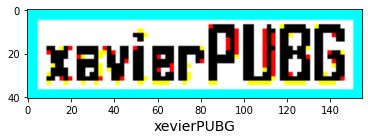

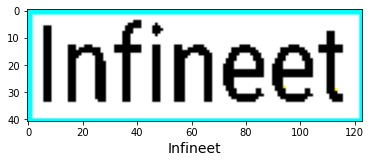

In [40]:
# Trained model - ALL IMAGES
# Add border to images
# Preprocessing - BINARY_INV
# Resizing to optimal 30-33 pixels in height
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY_INV', preprocessing_add_border=True, preprocessing_resize_3033=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

x.print_one_example('username_pubg_141.png')
x.print_one_example('username_pubg_135.png')

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : 'BINARY_INV',
                    'Border' : True, 
                    'Resize_3033' : True, 
                    'ImproveQualityForSmall' : False, 
                    'GrayScale' : False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

In [41]:
x.getWorst('ALL',90)

,LevenshteinScore,image_name,score,score__tessdata,score_eval,score_lev,stat,stat__tessdata,stat_eval,stat_lev,username,username__tessdata,username_eval,username_lev
1,66.666667,pubg_101.jpg,#1/50,,0.0,0.00,#1 8 858,#1 8 858,1.0,100.00,Krismeisterr,Krismeisterr,1.0,100.0
64,66.666667,pubg_164.jpg,#1/95,#1/0,0.0,60.00,#1 3 937,#1 3 937,0.0,87.50,Real_ARTY,Real_ARTY,1.0,100.0
63,66.666667,pubg_163.jpg,#8/99,1,0.0,0.00,#8 5 358,#8 5 358,1.0,100.00,George19123,George19123,1.0,100.0
62,66.666667,pubg_162.jpg,#1/29,,0.0,0.00,#1 3 596,#1 3 596,0.0,87.50,Notzie,Notzie,1.0,100.0
61,66.666667,pubg_161.jpg,#1/99,/99,0.0,60.00,#1 27 1586,#1 27 1586,1.0,100.00,GeneratedScreenShot,GeneratedScreenShot,1.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,66.666667,pubg_126.jpg,#4/100,#4100,0.0,83.33,#4 9 493,#4 9 493,1.0,100.00,Angel24k,Angel24k,1.0,100.0
25,66.666667,pubg_125.jpg,#28/100,/100,0.0,57.14,#28 3 237,#28 3 237,1.0,100.00,testerbg,testerbg,1.0,100.0
24,66.666667,pubg_124.jpg,#25/100,#25 100,0.0,85.71,#25 4 137,#25 4 137,1.0,100.00,ParasSolanki,ParasSolanki,1.0,100.0
44,66.666667,pubg_144.jpg,#39/48,5\n740,0.0,16.67,#39 0 26,#39 0 26,0.0,87.50,alexmannnnnnnnn,alexmannnnnnnnn,1.0,100.0


#### Border, Inversed BINARY, Improved Quality

0.47808764940239046
73.73012096774194


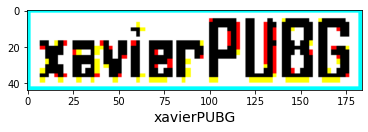

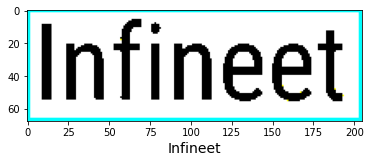

In [42]:
# Trained model - ALL IMAGES
# Add border to images
# Preprocessing - BINARY_INV
# Improved quality
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY_INV', preprocessing_add_border=True, improve_quality_for_small=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

x.print_one_example('username_pubg_141.png')
x.print_one_example('username_pubg_135.png')

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : x.preprocessing if x.preprocessing != None else False, #'BINARY_INV', True if x.preprocessing == None else False
                    'Border' : True if x.preprocessing_add_border != None else False, #False, 
                    'Resize_3033' : True if x.preprocessing_resize_3033 != None else False, #False, 
                    'ImproveQualityForSmall' : True if x.improve_quality_for_small != None else False, #True, 
                    'GrayScale' : True if x.grayscale != None else False, #False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

#### Border, Binary, resizing 30-33

0.450199203187251
74.20633064516129


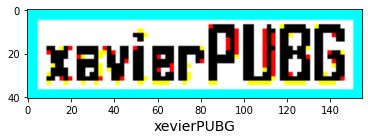

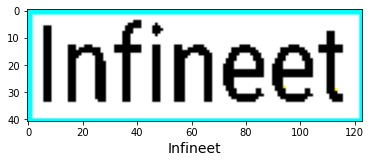

In [43]:
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY_INV', preprocessing_add_border=True, preprocessing_resize_3033=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

x.print_one_example('username_pubg_141.png')
x.print_one_example('username_pubg_135.png')

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : x.preprocessing if x.preprocessing != None else False, #'BINARY_INV', True if x.preprocessing == None else False
                    'Border' : True if x.preprocessing_add_border != None else False, #False, 
                    'Resize_3033' : True if x.preprocessing_resize_3033 != None else False, #False, 
                    'ImproveQualityForSmall' : True if x.improve_quality_for_small != None else False, #True, 
                    'GrayScale' : True if x.grayscale != None else False, #False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

#### Add border and BINARY image preprocessing and improved quality

0.24701195219123506
44.22879032258064


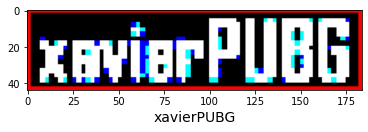

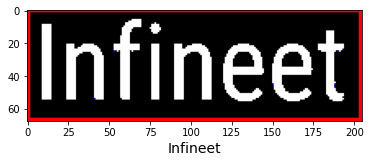

In [44]:
# Trained model - ALL IMAGES
# Add border to images
# Preprocessing - BINARY
# Apply improved quality(works only for images that is lower than 40 in height size) instead of "Resizing to optimal 30-33 pixels in height"
x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY', preprocessing_add_border=True, improve_quality_for_small=True)

x.image_text_to_strings('AgencyFB')

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

x.print_one_example('username_pubg_141.png')
x.print_one_example('username_pubg_135.png')

resultTable = resultTable.append({'Dataset' : 'cropped_images_manual_full', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : x.preprocessing if x.preprocessing != None else False, #'BINARY_INV', True if x.preprocessing == None else False
                    'Border' : True if x.preprocessing_add_border != None else False, #False, 
                    'Resize_3033' : True if x.preprocessing_resize_3033 != None else False, #False, 
                    'ImproveQualityForSmall' : True if x.improve_quality_for_small != None else False, #True, 
                    'GrayScale' : True if x.grayscale != None else False, #False, 
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

In [0]:
# Download results
#from google.colab import files
#x.eval_table.to_csv('evald2.csv', encoding='utf-8')
#!zip -r evald2.zip evald2.csv
#files.download("evald2.zip")

### Mixed run. A few models in one block for manual manipulations

In [0]:
# Trained model - ALL IMAGES
x1 = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'))
x1.image_text_to_strings('AgencyFB')

x2 = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing_add_border=True)
x2.image_text_to_strings('AgencyFB')

x3 = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY', preprocessing_add_border=True)
x3.image_text_to_strings('AgencyFB')

x4 = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='OTSU', preprocessing_add_border=True)
x4.image_text_to_strings('AgencyFB')

x5 = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing_add_border=True, improve_quality_for_small=True) # resize to bigger one if less than 50 height
x5.image_text_to_strings('AgencyFB')

x6 = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), preprocessing='BINARY_INV', preprocessing_resize_3033=True)
x6.image_text_to_strings('AgencyFB')

#### Print examples of each model

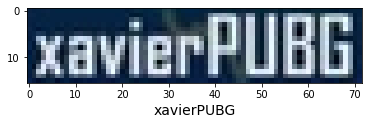

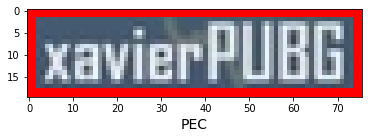

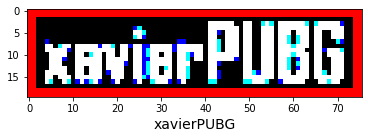

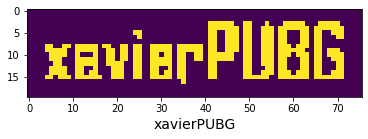

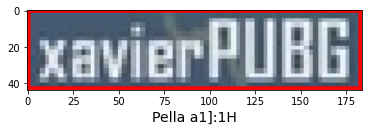

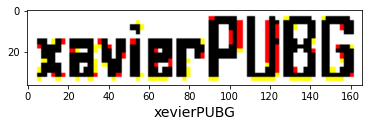

In [17]:
x1.print_one_example('username_pubg_141.png')
x2.print_one_example('username_pubg_141.png')
x3.print_one_example('username_pubg_141.png')
x4.print_one_example('username_pubg_141.png')
x5.print_one_example('username_pubg_141.png')
x6.print_one_example('username_pubg_141.png')

### Show summary table

In [48]:
resultTable.sort_values('LevenshteinScore')

,Dataset,Model,Class,Preprocessing,Border,Resize_3033,ImproveQualityForSmall,GrayScale,FullTextScore,LevenshteinScore
1,cropped_images_manual_full,AgencyFB,score,None,False,False,False,False,0.000000,29.935556
25,cropped_images_manual_full,AgencyFB,ALL,BINARY,True,False,True,False,0.247012,44.228790
12,cropped_images_manual_full,AgencyFB,ALL,BINARY,True,False,False,False,0.294821,46.288669
8,cropped_images_manual_full,AgencyFB,ALL,BINARY,False,False,False,False,0.306773,48.933065
14,cropped_images_manual_full,AgencyFB,ALL,BINARY,False,False,True,False,0.302789,49.352702
4,cropped_images_manual_full,Default,ALL,None,False,False,False,False,0.270916,52.026694
13,cropped_images_manual_full,AgencyFB,ALL,BINARY,False,True,False,False,0.302789,52.738427
10,cropped_images_manual_full,AgencyFB,ALL,OTSU,False,False,False,False,0.306773,52.768589
18,cropped_images_manual_full,AgencyFB,ALL,OTSU2,True,False,False,False,0.334661,53.212097
15,cropped_images_manual_full,AgencyFB,ALL,OTSU,True,False,False,False,0.334661,53.212097


### Execution of best model for PC images dataset only

In [49]:
#resultTable[resultTable['Value']==resultTable['Value'].max()]
#resultTable.loc[resultTable['LevenshteinScore'].idxmax()]

# Get image filter
filter_list_pc = []
for r, d, f in os.walk(os.path.join(WORKDIR, 'datasets', 'pubg_only_pc')):
        for file in f:
            if '.jpg' in file:
              filter_list_pc.append(file.split("_",1)[1][0:3])

paramTable = resultTable.drop(resultTable[resultTable.Class != 'ALL'].index)

x = TextProcessor(os.path.join(WORKDIR, 'datasets', 'pubg', 'cropped_images_manual'), 
                  preprocessing             = paramTable.loc[paramTable['LevenshteinScore'].idxmax()]['Preprocessing'], 
                  preprocessing_add_border  = paramTable.loc[paramTable['LevenshteinScore'].idxmax()]['Border'], 
                  improve_quality_for_small = paramTable.loc[paramTable['LevenshteinScore'].idxmax()]['ImproveQualityForSmall'],
                  preprocessing_resize_3033 = paramTable.loc[paramTable['LevenshteinScore'].idxmax()]['Resize_3033'],
                  use_grayscale             = paramTable.loc[paramTable['LevenshteinScore'].idxmax()]['GrayScale'],
                  filter_list = filter_list_pc)

x.image_text_to_strings(paramTable.loc[paramTable['LevenshteinScore'].idxmax()]['Model'])

#for item in x.text_boxes:
#  print(x.text_boxes[item])

fulltext_score = x.evaluate_manual('ALL')
lev_score = x.calculate_eval_Levenshtein('ALL')

print(fulltext_score)
print(lev_score)

resultTable = resultTable.append({'Dataset' : 'PC_only', 
                    'Model' : 'AgencyFB', 
                    'Class' : 'ALL', 
                    'Preprocessing' : x.preprocessing if x.preprocessing != None else False,
                    'Border' : True if x.preprocessing_add_border != None else False,
                    'Resize_3033' : True if x.preprocessing_resize_3033 != None else False,
                    'ImproveQualityForSmall' : True if x.improve_quality_for_small != None else False,
                    'GrayScale' : True if x.grayscale != None else False,
                    'FullTextScore' : fulltext_score, 
                    'LevenshteinScore' : lev_score} , ignore_index=True)

0.43089430894308944
74.55634146341464


#### Summary with execution for PC only

In [50]:
resultTable.sort_values('LevenshteinScore')

,Dataset,Model,Class,Preprocessing,Border,Resize_3033,ImproveQualityForSmall,GrayScale,FullTextScore,LevenshteinScore
1,cropped_images_manual_full,AgencyFB,score,None,False,False,False,False,0.000000,29.935556
25,cropped_images_manual_full,AgencyFB,ALL,BINARY,True,False,True,False,0.247012,44.228790
12,cropped_images_manual_full,AgencyFB,ALL,BINARY,True,False,False,False,0.294821,46.288669
8,cropped_images_manual_full,AgencyFB,ALL,BINARY,False,False,False,False,0.306773,48.933065
14,cropped_images_manual_full,AgencyFB,ALL,BINARY,False,False,True,False,0.302789,49.352702
4,cropped_images_manual_full,Default,ALL,None,False,False,False,False,0.270916,52.026694
13,cropped_images_manual_full,AgencyFB,ALL,BINARY,False,True,False,False,0.302789,52.738427
10,cropped_images_manual_full,AgencyFB,ALL,OTSU,False,False,False,False,0.306773,52.768589
18,cropped_images_manual_full,AgencyFB,ALL,OTSU2,True,False,False,False,0.334661,53.212097
15,cropped_images_manual_full,AgencyFB,ALL,OTSU,True,False,False,False,0.334661,53.212097


# Tesseract run using installed module from unix console

In [51]:
!tesseract segmentation/datasets/pubg/cropped_images_manual/username_pubg_141.png username_141 --psm 6 -c tessedit_char_whitelist=0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ[]_- lstmbox

Tesseract Open Source OCR Engine v5.0.0-alpha-689-ga06d with Leptonica
